# Clean And Analyze Employee Exit Surveys

Goal: The project aims to answer the following questions
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Method: The main analysis is data interpretation using PyPlot and NumPy libraries.

Data set: The exit surveys from employees of the Department of Education, Training and Employment ([DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)) and the Technical and Further Education ([TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)) institute in Queensland, Australia.


### <a id = 0> Table of contents:</a>

---

1. [Open the data](#1)
2. [Primary NaN cleaning](#2)
3. [Column names cleaning](#3)
4. [Keep resignation as the main reason](#4)
5. [Years cleaning](#5)
6. [Dissatisfaction](#6)
7. [Combine the datasets](#7)
8. [Years of service](#8)
9. [Category vs exit dissatisfaction](#9)

<a id = 1> Open the data: </a> - [Top](#0)

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#open file
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### About data 

`dete_survey.cs`

|Variable|Description|
|-----------|-----------|
|Record ID|An id used to identify the participant of the survey|
|Reason for ceasing employment|The reason why the person's employment ended|
|LengthofServiceOverall. Overall Length of Service at Institute (in years)|The length of the person's employment (in years)|


`tafe_survey.cs`

|Variable|Description|
|-----------|-----------|
|ID|An id used to identify the participant of the survey|
|SeparationType|The reason why the person's employment ended|
|Cease Date|The year or month the person's employment ended|
|DETE Start Date|The year the person began employment with the DETE|

In [2]:
#get info about data set
print("(Nrow, Ncol): ",dete_survey.shape)
print("\n")
dete_survey.info()

(Nrow, Ncol):  (822, 56)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to pri

In [3]:
print(dete_survey.head())

   ID                    SeparationType Cease Date DETE Start Date  \
0   1             Ill Health Retirement    08/2012            1984   
1   2  Voluntary Early Retirement (VER)    08/2012      Not Stated   
2   3  Voluntary Early Retirement (VER)    05/2012            2011   
3   4         Resignation-Other reasons    05/2012            2005   
4   5                    Age Retirement    05/2012            1970   

  Role Start Date                                      Position  \
0            2004                                Public Servant   
1      Not Stated                                Public Servant   
2            2011                               Schools Officer   
3            2006                                       Teacher   
4            1989  Head of Curriculum/Head of Special Education   

  Classification              Region                      Business Unit  \
0        A01-A04      Central Office  Corporate Strategy and Peformance   
1        AO5-AO7      Cent

In [4]:
print(dete_survey.tail())

      ID                        SeparationType Cease Date DETE Start Date  \
817  819                        Age Retirement    02/2014            1977   
818  820                        Age Retirement    01/2014            1980   
819  821  Resignation-Move overseas/interstate    01/2014            2009   
820  822                 Ill Health Retirement    12/2013            2001   
821  823  Resignation-Move overseas/interstate    12/2013      Not Stated   

    Role Start Date        Position Classification                    Region  \
817            1999         Teacher        Primary        Central Queensland   
818            1980         Teacher      Secondary               North Coast   
819            2009  Public Servant        A01-A04            Central Office   
820            2009         Teacher      Secondary  Darling Downs South West   
821      Not Stated    Teacher Aide            NaN              Metropolitan   

            Business Unit    Employment Status  ...  Kep

In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [6]:
dete_survey["Age"].unique()

array(['56-60', '61 or older', '36-40', '41-45', '31-35', '46-50',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

In [7]:
print("(Nrow, Ncol): ",tafe_survey.shape)
print("\n")
print(tafe_survey.info())

(Nrow, Ncol):  (702, 72)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                       

In [8]:
print(tafe_survey.head())

      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                                  -   
2                   

In [9]:
print(tafe_survey.tail())

        Record ID                              Institute  \
697  6.350668e+17         Barrier Reef Institute of TAFE   
698  6.350677e+17  Southern Queensland Institute of TAFE   
699  6.350704e+17       Tropical North Institute of TAFE   
700  6.350712e+17      Southbank Institute of Technology   
701  6.350730e+17       Tropical North Institute of TAFE   

                     WorkArea  CESSATION YEAR Reason for ceasing employment  \
697       Delivery (teaching)          2013.0                   Resignation   
698  Non-Delivery (corporate)          2013.0                   Resignation   
699       Delivery (teaching)          2013.0                   Resignation   
700  Non-Delivery (corporate)          2013.0              Contract Expired   
701  Non-Delivery (corporate)          2013.0                   Resignation   

    Contributing Factors. Career Move - Public Sector   \
697                        Career Move - Public Sector   
698                        Career Move - Public 

In [10]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

In [11]:
tafe_survey["CurrentAge. Current Age"].unique()

array(['26  30', nan, '41  45', '56 or older', '20 or younger', '46  50',
       '36  40', '21  25', '51-55', '31  35'], dtype=object)

### Primary observations: 

`dete_survey.cs`

- Multiple columns contain `Not Stated` instead of `NaN` that should be replaced.

- "Cease Date" is indicated as Month/Year.

`tafe_survey.cs`

- Multiple columns contain `-` instead of `NaN` that should be repaced.


`dete_survey.cs` and `tafe_survey.cs`

- Both datasets contain additional information, that is not usefulf for our task. 

- The two datasets contain the same information but under different column names, that should be unified for further analysis.

- There are multiple columns or answers indicating the dissatisfaction as a resignation reason.

<a id = 2> Primary NaN cleaning: </a> - [Top](#0)

The `dete_survey.cs` CSV file is read into pandas again, but this time the `Not Stated value` are read as `NaN`.

In [12]:
dete_survey = pd.read_csv("dete_survey.csv", na_values=["Not Stated"])

#drop irrelevant columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)

The `tafe_survey.cs` CSV file is read into pandas again, but this time irrelevant columns are droped.

In [13]:
#drop irrelevant columns
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

<a id = 3> Column names cleaning: </a> - [Top](#0)

|dete_survey|tafe_survey|Definition|
|-----------|-----------|-----------|
|ID|Record ID|An id used to identify the participant of the survey|
|SeparationType|Reason for ceasing 
employment|The reason why the person's employment ended|
|Cease Date|CESSATION YEAR|The year or month the person's employment ended|
|DETE Start Date| |The year the person began employment with the DETE|
| |LengthofServiceOverall. Overall Length of Service  at Institute (in years)|The length of the person's employment (in years)|
|Age|CurrentAge. Current Age|The age of the participant|
|Gender|Gender. What is your Gender?|The gender of the participant|

The column names should be unified for the further analysis.

For `dete_survey_updated`:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

For `tafe_survey_updated`:
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [14]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(" ","_")

In [15]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
#new column names
tafe_col_names = {'Record ID': 'id',
                 'CESSATION YEAR': 'cease_date',
                 'Reason for ceasing employment': 'separationtype',
                 'Gender. What is your Gender?': 'gender',
                 'CurrentAge. Current Age': 'age',
                 'Employment Type. Employment Type': 'employment_status',
                 'Classification. Classification': 'position',
                 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#renaming
tafe_survey_updated.rename(tafe_col_names, axis=1,inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

<a id = 4> Keep resignation as the main reason: </a> - [Top](#0)

Both datasets contain multiple reasons for the separation with the company. For the purpose of this project, we will keep only "Resignation" reason regardless its specifics for the further analysis.

In [17]:
#list of reasons for the separation witht he company
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [18]:
#list of reasons for the separation witht he company
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [19]:
#for dete keep only the column contains the word "Resignation"
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains("Resignation")]
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [20]:
#for tafe keep only the column with "Resignation"
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"] == "Resignation"]


<a id = 5> Years cleaning: </a> - [Top](#0)

We verify that the years in the "cease_date" and "dete_start_date" columns make sense.

To unifiy the data representation, we add a new column called `institute_service` to "dete_resignation" being a difference of between the `cease_date` column and the `dete_start_date` column.

In [21]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64

In [22]:
dete_resignations = dete_resignations.copy()
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.replace(r'^.*?/', '').astype(float)

In [23]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [24]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [25]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [26]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
dete_resignations["institute_service"].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

<a id = 6> Dissatisfaction: </a> - [Top](#0)

To categorized the resignation reason as dissatisfaction we will

1) create a new column called "dissatisfied" in both datasets

2) use the following columns 

for `tafe_resignations`:
- "Contributing Factors. Dissatisfaction"
- "Contributing Factors. Job Dissatisfaction"

for `dete_resignations`:
- "job_dissatisfaction"
- "dissatisfaction_with_the_department"
- "physical_work_environment"
- "lack_of_recognition"
- "lack_of_job_security"
- "work_location"
- "employment_conditions"
- "work_life_balance"
- "workload"

If any of these entries in the row is not empty = True, then the reason is categorized as dissatisfaction: store in a new column "True".

If none of these entries in the row is empty, then the reason is not categorized as dissatisfaction: store in a new column "False".

If all these entries in the row is NaN, then the reason is categorized as NaN: store in a new column "NaN".


In [27]:
#values in the two columns
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False))

print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [28]:
#function to convert to True, False or NaN entries in the two columns
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == "-" or val == False:
        return False
    else:
        return True
    
#combine the two columns of "tafe" for the analysis and create a new column
tafe_resignations = tafe_resignations.copy()
tafe_dis_col = ["Contributing Factors. Dissatisfaction",
                "Contributing Factors. Job Dissatisfaction"
               ]
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_dis_col].applymap(update_vals).any(axis=1, skipna=False)

print("\n", "dissatisfied in tafe_resignations", "\n")
print(tafe_resignations["dissatisfied"].value_counts(dropna=False))


#combine the two columns of "tafe" for the analysis and create a new column
dete_resignations = dete_resignations.copy()
dete_dis_col = ['job_dissatisfaction',
                'dissatisfaction_with_the_department',
                'physical_work_environment',
                'lack_of_recognition',
                'lack_of_job_security',
                'work_location',
                'employment_conditions',
                'work_life_balance', 
                'workload'
               ]
dete_resignations["dissatisfied"] = dete_resignations[dete_dis_col].applymap(update_vals).any(axis=1, skipna=False)

print("\n", "dissatisfied in dete_resignations", "\n")
print(dete_resignations["dissatisfied"].value_counts(dropna=False))


 dissatisfied in tafe_resignations 

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

 dissatisfied in dete_resignations 

False    162
True     149
Name: dissatisfied, dtype: int64


<a id = 7> Combine the datasets: </a> - [Top](#0)

We combine the two dataframes into one called `combined` using a label "DETE" or "TAFE" to distinguish between them. Further we clean the dataset and drop any cilumns with less than 500 null values.

In [29]:
#add a recognition column to each dataframe
dete_resignations["institute"] = "DETE"
tafe_resignations["institute"] = "TAFE"

#combine the dataframes
combined = pd.concat([dete_resignations,tafe_resignations], axis = 0)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [30]:
#drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1)
combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
separationtype       651
institute            651
dtype: int64

<a id = 8> Years of service: </a> - [Top](#0)

We introduce the new column "service_cat" that categorize employees according to the years of service at the company into 4 categorise:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

For that first we cleaned and unified the "institute_service" column .

In [31]:
combined_updated["institute_service"].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [32]:
#change the type of data to string and extract only digits (\d+)
combined_updated = combined_updated.copy()
combined_updated['institute_service'] = combined_updated['institute_service'].astype("str").str.extract(r'(\d+)')
#change the type of data to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype("float")
combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [33]:
#function to map the years of service to one of the 4  categorise
#- New: Less than 3 years at a company
#- Experienced: 3-6 years at a company
#- Established: 7-10 years at a company
#- Veteran: 11 or more years at a company 

def mapping(val):
    if val < 3:
        return "New"
    elif 3<=val<=6:
        return "Experienced"
    elif 7<=val<=10:
        return "Established"
    elif val>=11:
        return "Veteran"
    elif pd.isnull(val):
        return "NaN"
    else:
        return "Not numeric value"
    
#apply the function to "institute_service" and save it as a column "service_cat"
combined_updated['service_cat'] = combined_updated['institute_service'].apply(mapping)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

<a id = 9> Category vs exit dissatisfaction: </a> - [Top](#0)

The final part we find the relation between the employee category, meaning years of service at the company, and the leaving reason being dissatisfaction or not.

In [34]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [35]:
#fill missing values witht he most frequent one in a column, i.e. False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

<AxesSubplot:title={'center':'Exited dissatisfied employees by service category'}, xlabel='service_cat'>

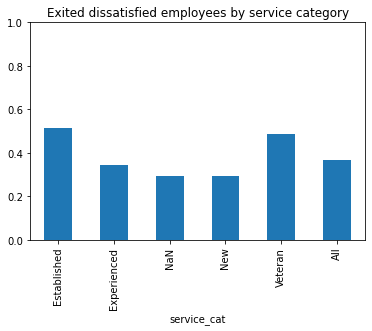

In [36]:
#create pivot_table
table = combined_updated.pivot_table(values = 'dissatisfied',
                                     index = "service_cat",
                                     aggfunc = np.mean,
                                     margins=True
                                    )

#plot the table
table.plot(kind='bar',
           title="Exited dissatisfied employees by service category",
           ylim=(0,1),
           legend=False
          )

On average across all categorise, there are less than 40% of dissatisfied exis employees. The highest percentage corresonds to the Expericensed and veteran emploteees, as it is highly likely if after more than 7 years working for the company an employee is leaving, he/she is not satisfied. However less experiences employee have higher level of satisfaction upon exiting the company.